# Multilayer Perceptrons Visualization on Cifar10 dataset
- Name: Minh T. Nguyen
- Date: 2/25/2023

In [1]:
# import libraries
import matplotlib.pyplot as plt
import collections
import numpy as np

# import tensorflow
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K

# 1. Data Visualization & Preprocessing
**Note**: 
- Let's download and visualize the cifar package.
- From the Keras API, we learned that there are 50k images for training and 10k images for testing, for both Cifar10 and Cifar100.

## 1.1. Data Visualization


In [2]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


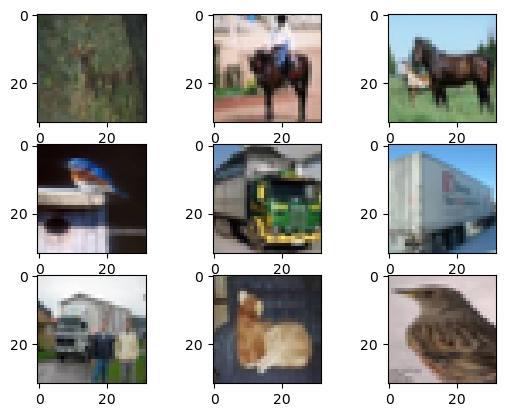

In [4]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Processing

In [5]:
# reshape images to RGB scale with width & height are size 32
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

# normalization to avoid gradient explode or vanish
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# check sample
print(f"Training sample 1: {X_train[0]}\n")
print(f"Training sample 1 shape: {X_train[0].shape}\n")

print(f"Training label 1: {y_train[0]}\n")
print(f"Training label 1 shape: {y_test[0].shape}\n")

Training sample 1: [0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]

Training sample 1 shape: (3072,)

Training label 1: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Training label 1 shape: (10,)



# 2. Modeling

In [7]:
# initialize parameters
num_epochs = 20
batch_size = 128

## 2.1. Simple Network Without Hidden Layer

### Build, Train, and Evaluate Model

In [8]:
# construct a model
model = Sequential()
model.add(Dense(10, input_shape=(3072,)))
model.add(Activation('softmax'))

In [9]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# check model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 5s 4ms/step - loss: 1.9282 - accuracy: 0.3157 - val_loss: 1.8461 - val_accuracy: 0.3513
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8254 - accuracy: 0.3608 - val_loss: 1.8486 - val_accuracy: 0.3491
Epoch 3/20
391/391 [==============================] - 1s 4ms/step - loss: 1.8076 - accuracy: 0.3700 - val_loss: 1.8249 - val_accuracy: 0.3589
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 1.7843 - accuracy: 0.3811 - val_loss: 1.8017 - val_accuracy: 0.3617
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 1.7667 - accuracy: 0.3895 - val_loss: 1.8142 - val_accuracy: 0.3562
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7646 - accuracy: 0.3883 - val_loss: 1.7679 - val_accuracy: 0.3766
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7592 - accuracy: 0.3912 - val_loss: 1.8022 - val_accuracy: 0.3665
Epoch 

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


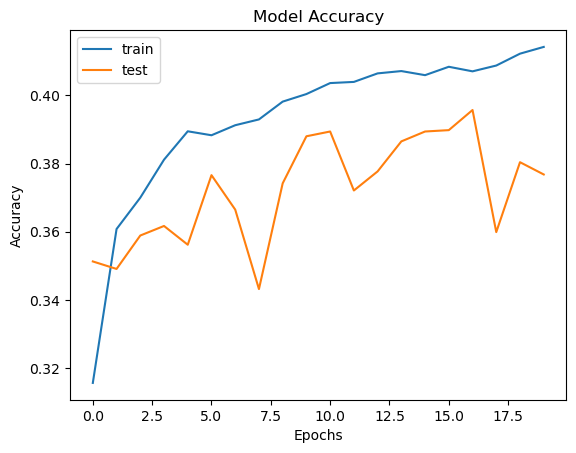

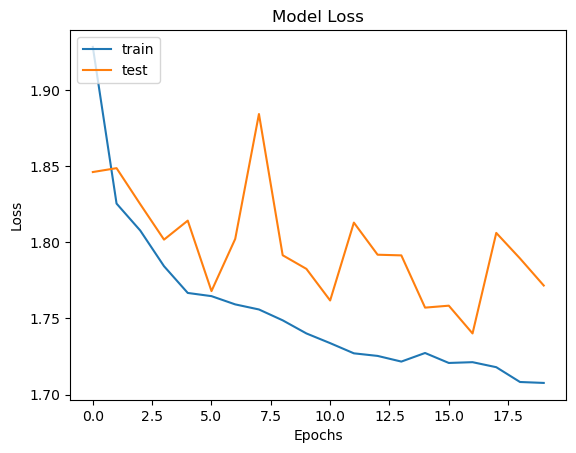

In [13]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 1.7715932130813599
Test acc: 0.376800000667572


### Weight and Layer Visualization 
- Let's visualize the weights between the input and output connection. Let's plot input, weight (aka, output in this case). 

In [15]:
# ref: https://www.kaggle.com/code/mommermi/mnist-neural-network-visualization
extract_layer_output = K.function([model.layers[0].input],
                              [model.layers[0].output, model.layers[1].output])

layer1_output, layer2_output = extract_layer_output([X_train])

In [16]:
print(layer1_output.shape)
print(layer2_output.shape)

(50000, 10)
(50000, 10)


In [17]:
def plot_layers_simple(idx=0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    ax1.set_title('Input Layer', fontsize=16)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    img_plot = ax1.imshow(X_train[idx].reshape((32,32,3)), animated=True)

    ax2.set_title('Output Layer', fontsize=16)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)   
    output_plot = ax2.imshow(np.append(layer1_output[idx], [np.nan, np.nan]).reshape((3,4)), animated=True)

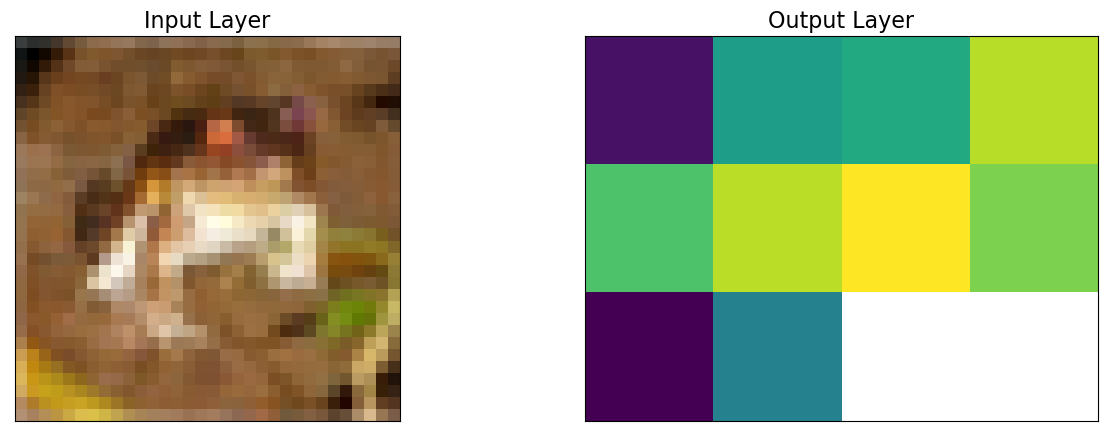

In [18]:
plot_layers_simple(idx=0)

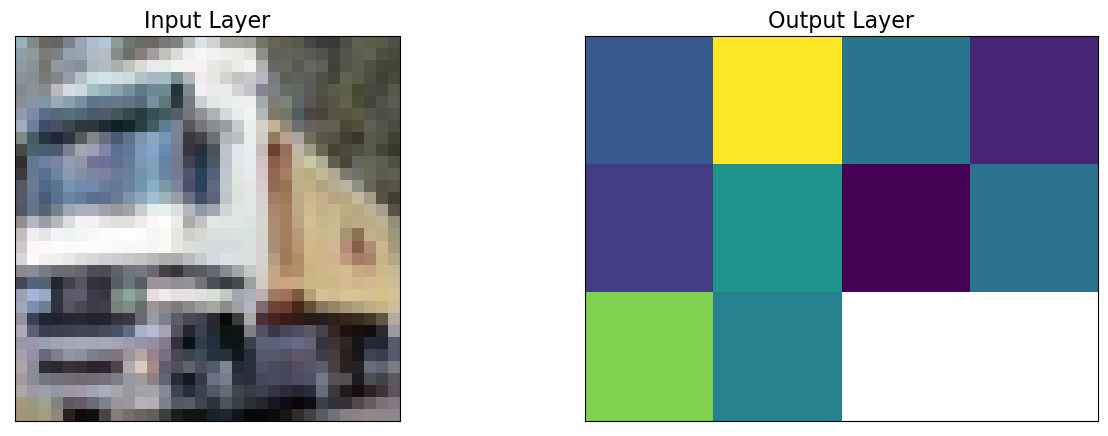

In [19]:
plot_layers_simple(idx=1)

## 2.2. Network with Hidden Layer

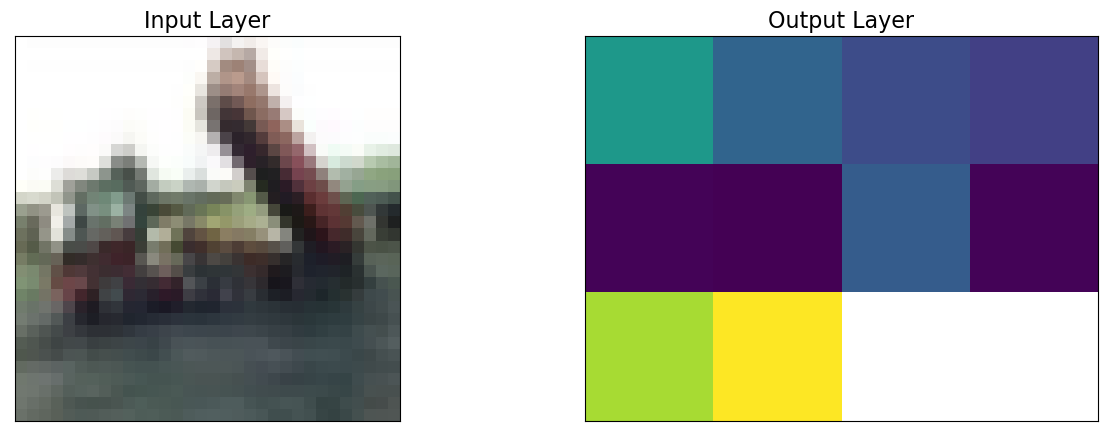

In [20]:
plot_layers_simple(idx=2)

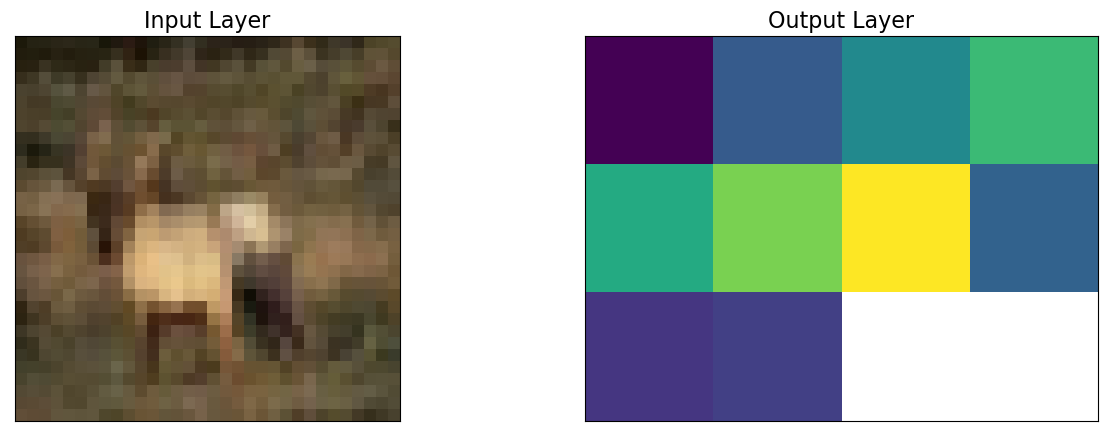

In [21]:
plot_layers_simple(idx=3)

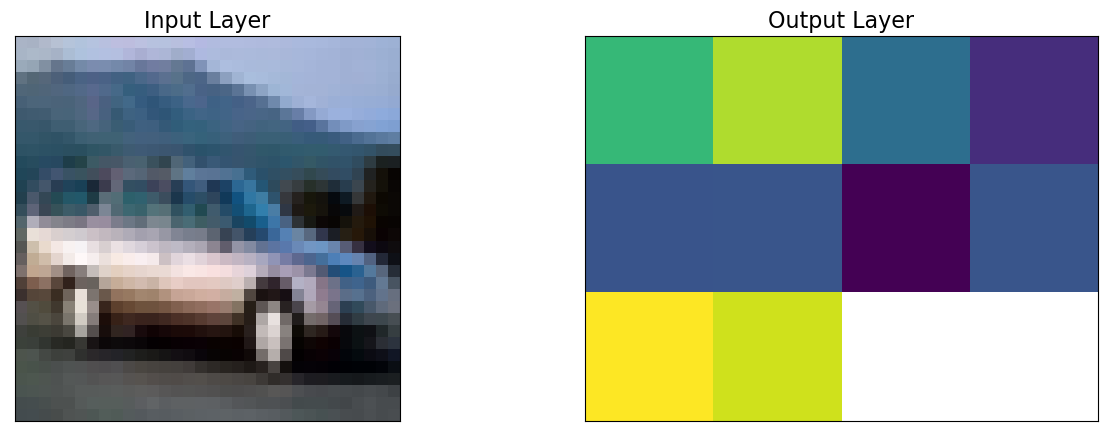

In [22]:
plot_layers_simple(idx=4)

### Build, Train, and Evaluate Model

In [23]:
# construct a model
model2 = Sequential()
model2.add(Dense(1024, input_shape=(3072,), name="input-layer-dense-1"))
model2.add(Activation('relu'))
model2.add(Dense(256, name="dense-2"))
model2.add(Activation('relu'))
# model2.add(Dense(256, name="dense-3"))
# model2.add(Activation('relu'))
model2.add(Dense(10, name="output-layer"))
model2.add(Activation('softmax'))

In [24]:
# compile model
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# check model architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer-dense-1 (Dense)  (None, 1024)             3146752   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                                 
 dense-2 (Dense)             (None, 256)               262400    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 output-layer (Dense)        (None, 10)                2570      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 3,411,722
Trainable params: 3,411,722
No

In [26]:
# train model
history = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.9233 - accuracy: 0.3189 - val_loss: 1.7478 - val_accuracy: 0.3685
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 1.6910 - accuracy: 0.3931 - val_loss: 1.6583 - val_accuracy: 0.4020
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 1.5982 - accuracy: 0.4312 - val_loss: 1.5685 - val_accuracy: 0.4443
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 1.5372 - accuracy: 0.4517 - val_loss: 1.5154 - val_accuracy: 0.4655
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 1.4922 - accuracy: 0.4664 - val_loss: 1.5359 - val_accuracy: 0.4422
Epoch 6/20
391/391 [==============================] - 1s 4ms/step - loss: 1.4599 - accuracy: 0.4792 - val_loss: 1.4892 - val_accuracy: 0.4648
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 1.4267 - accuracy: 0.4907 - val_loss: 1.4313 - val_accuracy: 0.4939
Epoch 

In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


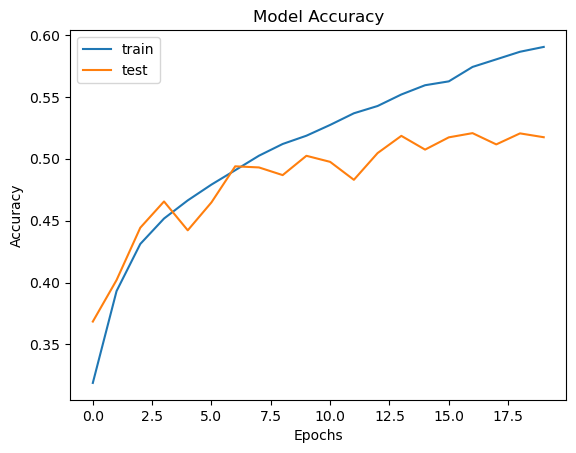

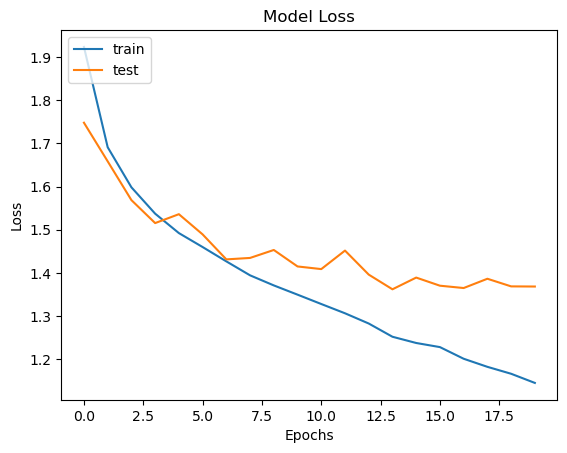

In [28]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# test model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 1.368423581123352
Test acc: 0.5174000263214111


### Weight and Layer Visualization 
- Let's visualize the weights between the input and output connection. Let's plot input, weight (aka, output in this case). 

In [30]:
# ref: https://www.kaggle.com/code/mommermi/mnist-neural-network-visualization
extract_layer_output = K.function([model2.layers[0].input],
                              [model2.layers[1].output, model2.layers[3].output, model2.layers[5].output])

layer1_output_m2, layer2_output_m2, layer3_output_m2 = extract_layer_output([X_train])

In [31]:
print(layer1_output_m2.shape)
print(layer2_output_m2.shape)
print(layer3_output_m2.shape)

(50000, 1024)
(50000, 256)
(50000, 10)


In [32]:
def plot_layers(idx=0):
    # set up 4 plots
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))
    
    # plot input layer
    ax1.set_title('Input Layer', fontsize=16)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    img_plot = ax1.imshow(X_train[idx].reshape((32,32,3)), animated=True)

    # plot the first hidden layer
    ax2.set_title('Hidden Layer 1', fontsize=16)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    weight_plot = ax2.imshow(layer1_output_m2[idx].reshape((32,32)), animated=True)

    # plot the second hidden layer
    ax3.set_title('Hidden Layer 2', fontsize=16)
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    weight_plot = ax3.imshow(layer2_output_m2[idx].reshape((16,16)), animated=True)

    # plot the output layer
    ax4.set_title('Output Layer', fontsize=16)
    ax4.axes.get_xaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)   
    output_plot = ax4.imshow(np.append(layer3_output_m2[idx], [np.nan, np.nan]).reshape((3,4)), animated=True)

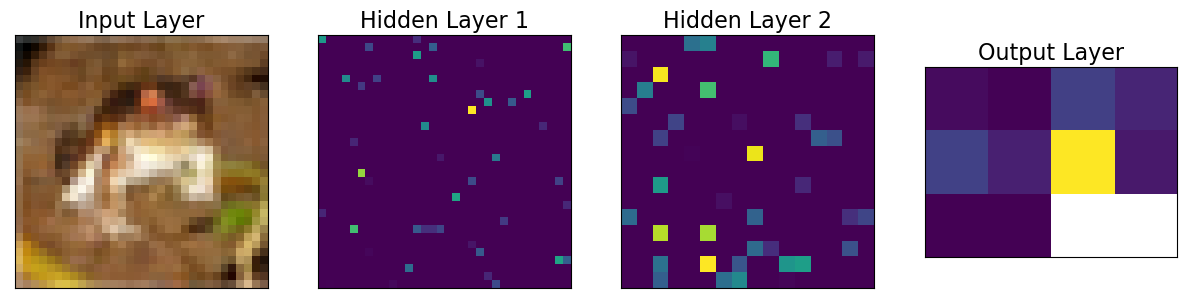

In [33]:
plot_layers(idx=0)

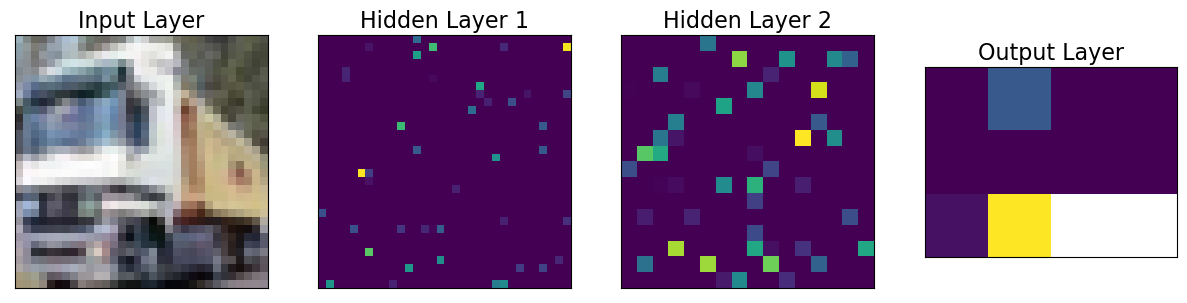

In [34]:
plot_layers(idx=1)

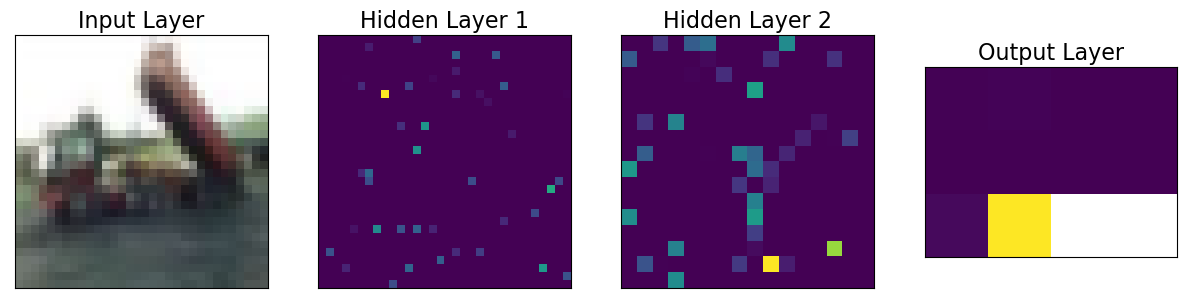

In [35]:
plot_layers(idx=2)

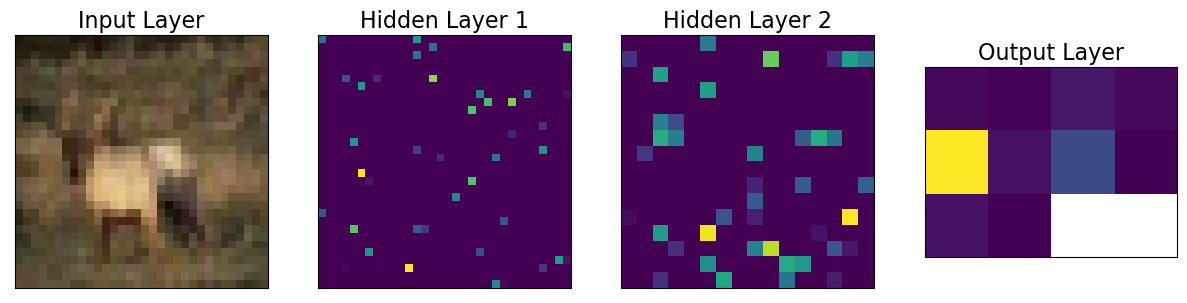

In [36]:
plot_layers(idx=3)

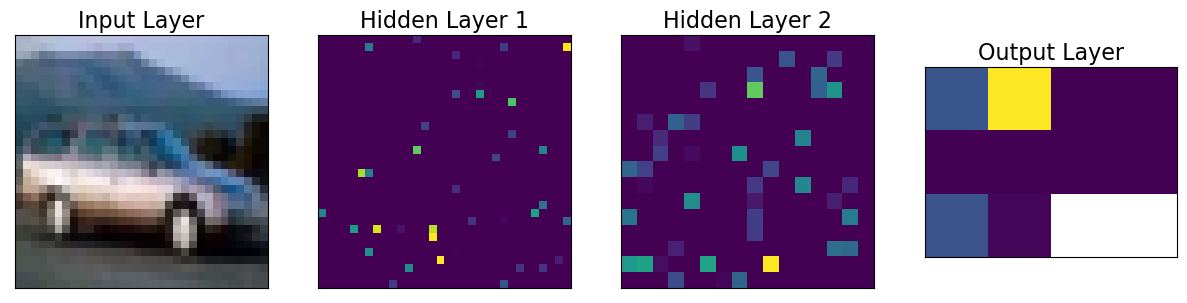

In [37]:
plot_layers(idx=4)